In [1]:
import matplotlib.pyplot as plt
import os
import sys
from from_result import *

mass = 27535.24841189485
energy_kelvin = 3700
energy = energy_kelvin * 3.1668105e-6
path = "../data"
save_path = "../plots"

Reaction rate for j = 0, Ω = 0

In [2]:
j_init = 0
omega_init = 0

losses = read_losses(f"{path}/losses_{energy_kelvin}_{j_init}_{omega_init}.dat")
Js = losses[:, 0]
BSigma_losses = losses[:, 1]
XPi_losses = losses[:, 2]

xpi_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, XPi_losses)
xpi_cross_sect = calc_cross_section(Js, xpi_part_cross_sect)
xpi_react_rate = calc_reaction_rate(mass, energy, xpi_cross_sect)

bsigma_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, BSigma_losses)
bsigma_cross_sect = calc_cross_section(Js, bsigma_part_cross_sect)
bsigma_react_rate = calc_reaction_rate(mass, energy, bsigma_cross_sect)

xpi_react_rate_00 = xpi_react_rate
bsigma_react_rate_00 = bsigma_react_rate

print("XPi reaction rate: ", xpi_react_rate_00)
print("A + B reaction rate: ", bsigma_react_rate_00)

XPi reaction rate:  2.405737765802982e-10
A + B reaction rate:  5.903270213176232e-10


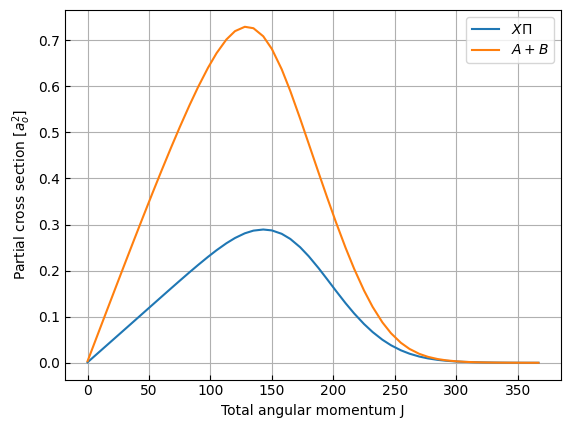

In [3]:
fig, ax = utility.plot()

ax.plot(Js, xpi_part_cross_sect, label="$X \Pi$")
ax.plot(Js, bsigma_part_cross_sect, label="$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend()

Reaction rate for j = 1, Ω = 0

In [4]:
j_init = 1
omega_init = 0

losses = read_losses(f"{path}/losses_{energy_kelvin}_{j_init}_{omega_init}.dat")
Js = losses[:, 0]
BSigma_losses = losses[:, 1]
XPi_losses = losses[:, 2]

xpi_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, XPi_losses)
xpi_cross_sect = calc_cross_section(Js, xpi_part_cross_sect)
xpi_react_rate = calc_reaction_rate(mass, energy, xpi_cross_sect)

bsigma_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, BSigma_losses)
bsigma_cross_sect = calc_cross_section(Js, bsigma_part_cross_sect)
bsigma_react_rate = calc_reaction_rate(mass, energy, bsigma_cross_sect)

xpi_react_rate_10 = xpi_react_rate
bsigma_react_rate_10 = bsigma_react_rate

print("XPi reaction rate: ", xpi_react_rate_10)
print("A + B reaction rate: ", bsigma_react_rate_10)

XPi reaction rate:  7.456919059287248e-11
A + B reaction rate:  2.2419455536649592e-10


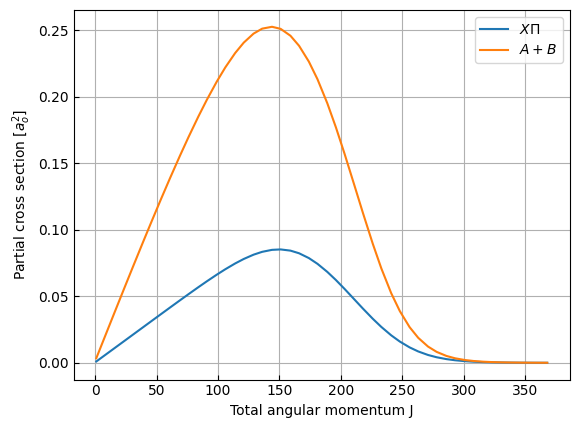

In [5]:
fig, ax = utility.plot()

ax.plot(Js, xpi_part_cross_sect, label="$X \Pi$")
ax.plot(Js, bsigma_part_cross_sect, label="$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend()

Reaction rate for j = 1, Ω = 1

In [6]:
j_init = 1
omega_init = 1

losses = read_losses(f"{path}/losses_{energy_kelvin}_{j_init}_{omega_init}.dat")
Js = losses[:, 0]
BSigma_losses = losses[:, 1]
XPi_losses = losses[:, 2]

xpi_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, XPi_losses)
xpi_cross_sect = calc_cross_section(Js, xpi_part_cross_sect)
xpi_react_rate = calc_reaction_rate(mass, energy, xpi_cross_sect)

bsigma_part_cross_sect = calc_partial_cross_sections(mass, energy, j_init, omega_init, Js, BSigma_losses)
bsigma_cross_sect = calc_cross_section(Js, bsigma_part_cross_sect)
bsigma_react_rate = calc_reaction_rate(mass, energy, bsigma_cross_sect)

xpi_react_rate_11 = xpi_react_rate
bsigma_react_rate_11 = bsigma_react_rate

print("XPi reaction rate: ", xpi_react_rate_11)
print("A + B reaction rate: ", bsigma_react_rate_11)

XPi reaction rate:  1.659908553457089e-10
A + B reaction rate:  3.660990471992392e-10


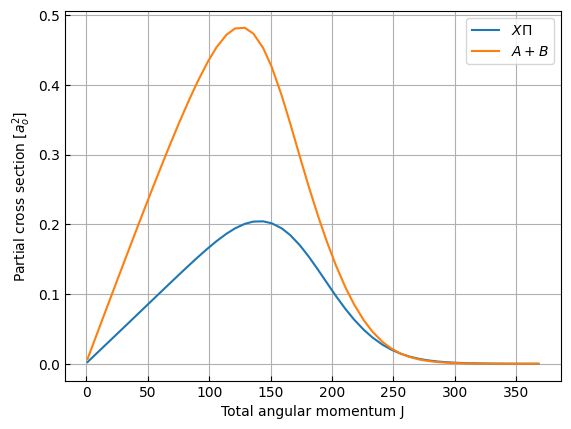

In [7]:
fig, ax = utility.plot()

ax.plot(Js, xpi_part_cross_sect, label="$X \Pi$")
ax.plot(Js, bsigma_part_cross_sect, label="$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend()

# Full reaction rates

In [8]:
xpi_react_rate0 = xpi_react_rate_00
bsigma_react_rate0 = bsigma_react_rate_00

xpi_react_rate1 = xpi_react_rate_10 + xpi_react_rate_11
bsigma_react_rate1 = bsigma_react_rate_10 + bsigma_react_rate_11

print(f"Total reaction rate for j=0:")
print(f"xpi: {xpi_react_rate0}")
print(f"A+B: {bsigma_react_rate0}")
print()
print(f"Total reaction rate for j=1:")
print(f"xpi: {xpi_react_rate1}")
print(f"A+B: {bsigma_react_rate1}")
print()
print(f"Ratios j=1 to j=0:")
print(f"xpi: {xpi_react_rate1/xpi_react_rate0}")
print(f"A+B: {bsigma_react_rate1/bsigma_react_rate0}")

Total reaction rate for j=0:
xpi: 2.405737765802982e-10
A+B: 5.903270213176232e-10

Total reaction rate for j=1:
xpi: 2.4056004593858136e-10
A+B: 5.902936025657351e-10

Ratios j=1 to j=0:
xpi: 0.9999429254430303
A+B: 0.9999433894253842


Energy dependence of reaction rates

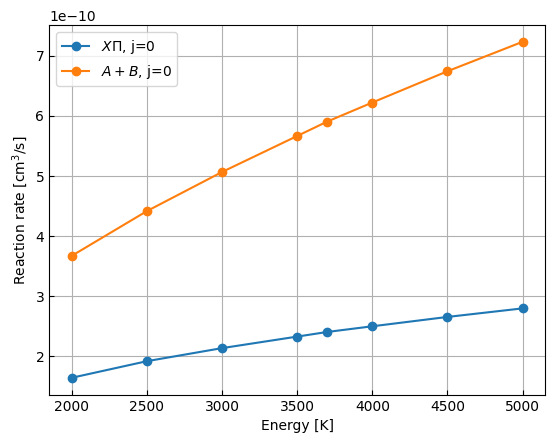

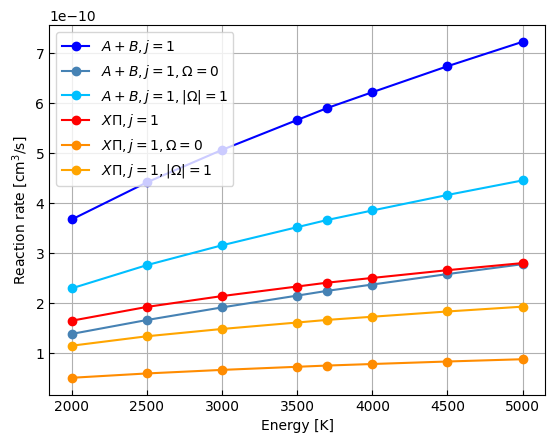

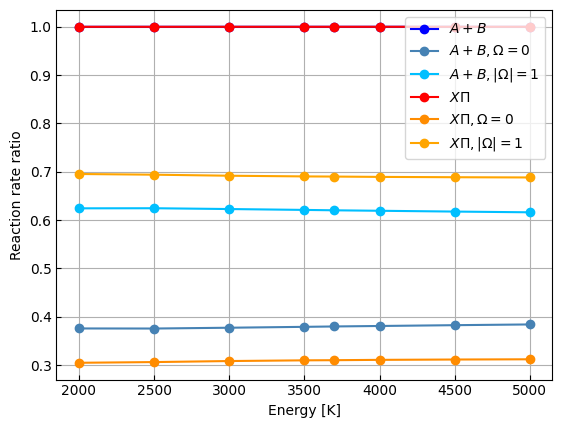

In [20]:
energies = [2000, 2500, 3000, 3500, 3700, 4000, 4500, 5000]

xpi0, xpi10, xpi11, bsigma0, bsigma10, bsigma11 = get_reaction_rate_dependence("losses", energies, is_energy_parameter=True, identity=None)

fig, ax = plot_reaction_rate_dependence_0("Energy [K]", energies, xpi0, bsigma0)
fig, ax = plot_reaction_rate_dependence_1("Energy [K]", energies, xpi10, xpi11, bsigma10, bsigma11)
fig, ax = plot_ratio_dependence("Energy [K]", energies, xpi0, xpi10, xpi11, bsigma0, bsigma10, bsigma11)